In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [44]:
tflite_model_name = 'gas_model'
c_model_name = 'gas_model'

In [17]:
data = pd.read_csv('data_fire_data_balanced.csv')

In [18]:
data.head()

,Gas,Humidity,Temperature,Label
0,282.963370,55.209494,28.589781,1
1,304.604781,69.092270,89.422993,1
2,224.962185,73.116419,67.292873,1
3,232.682910,29.799199,97.889589,1
4,258.542344,98.790862,64.292874,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gas          2000 non-null   float64
 1   Humidity     2000 non-null   float64
 2   Temperature  2000 non-null   float64
 3   Label        2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


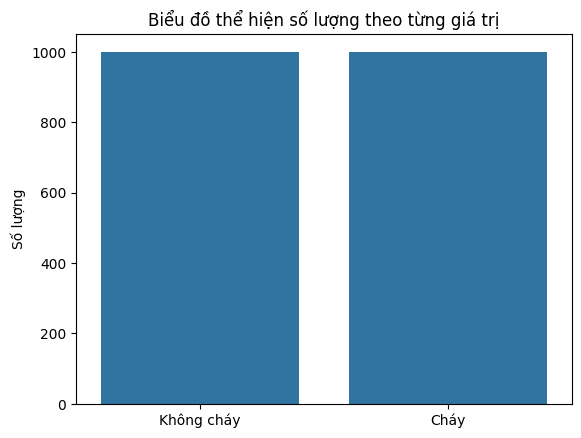

In [20]:
sns.countplot(data=data, x='Label');
plt.xticks([0,1], ['Không cháy', 'Cháy']);
plt.xlabel('')
plt.ylabel('Số lượng')
plt.title("Biểu đồ thể hiện số lượng theo từng giá trị");

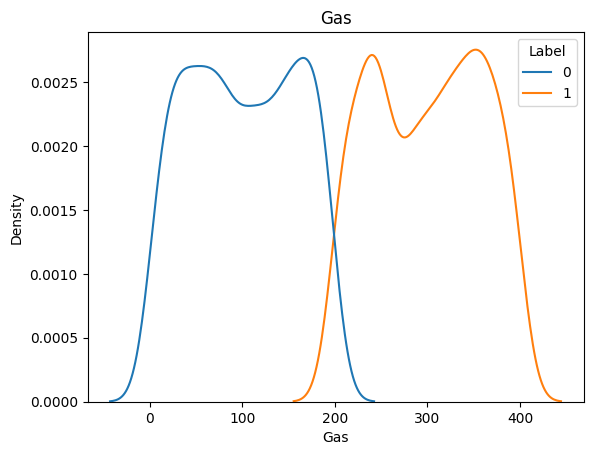

In [23]:
sns.kdeplot(data=data, x='Gas', hue='Label')
plt.title('Gas')
plt.show()

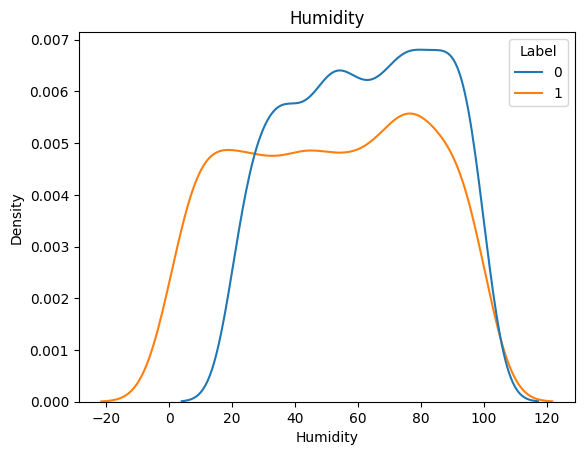

In [25]:
sns.kdeplot(data=data, x='Humidity', hue='Label')
plt.title('Humidity')
plt.show()

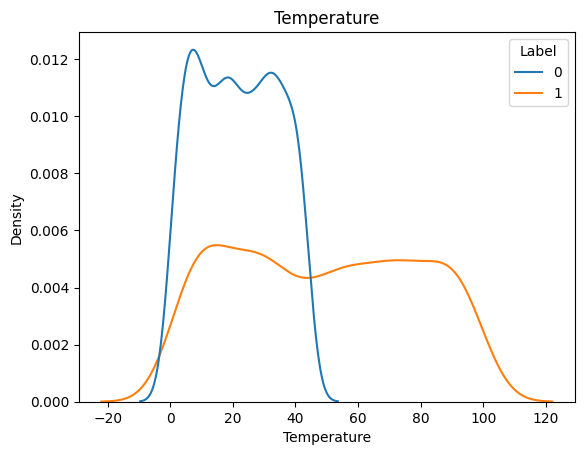

In [26]:
sns.kdeplot(data=data, x='Temperature', hue='Label')
plt.title('Temperature')
plt.show()

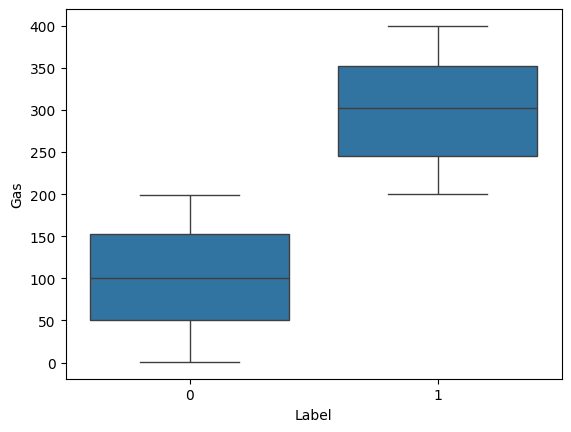

In [27]:
sns.boxplot(data=data, x='Label', y='Gas')
plt.show()

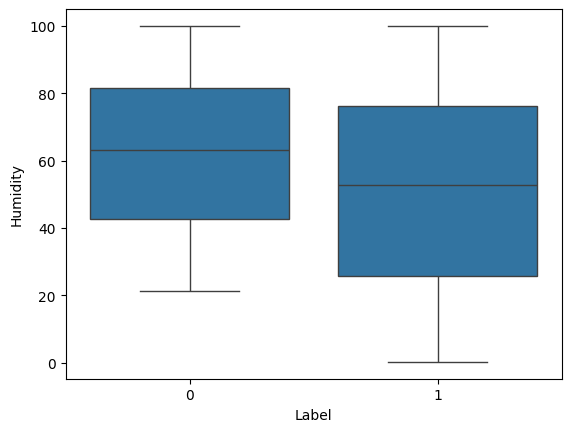

In [28]:
sns.boxplot(data=data, x='Label', y='Humidity')
plt.show()

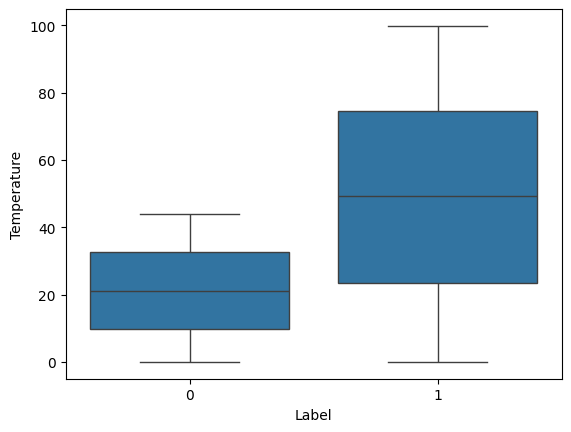

In [29]:
sns.boxplot(data=data, x='Label', y='Temperature')
plt.show()

In [21]:
data.columns

Index(['Gas', 'Humidity', 'Temperature', 'Label'], dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data[['Gas', 'Humidity', 'Temperature']]
y = data['Label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape[1]

3

In [31]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
  min_delta = 0.0001, # minimium amount of change to cout as an improvement
  patience=20,
  restore_best_weights=True
)

In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32,  verbose=1)

Epoch 1/200


50/50 [==============================] - 1s 6ms/step - loss: 2.0803 - accuracy: 0.7738 - val_loss: 0.3166 - val_accuracy: 0.9100
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9044 - val_loss: 0.1858 - val_accuracy: 0.9250
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9119 - val_loss: 0.1739 - val_accuracy: 0.9225
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9075 - val_loss: 0.1840 - val_accuracy: 0.9125
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9131 - val_loss: 0.1781 - val_accuracy: 0.9225
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9125 - val_loss: 0.1693 - val_accuracy: 0.9300
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9125 - val_loss: 0.1638 - val_accuracy: 0.9175
Epoch 8/200

In [36]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_loss_std = np.std(train_loss)
val_loss_std = np.std(val_loss)
print(f"Độ lệch chuẩn của mất mát trên tập huấn luyện: {train_loss_std}")
print(f"Độ lệch chuẩn của mất mát trên tập kiểm tra: {val_loss_std}")

Độ lệch chuẩn của mất mát trên tập huấn luyện: 0.14838920964414878
Độ lệch chuẩn của mất mát trên tập kiểm tra: 0.03359135095993869


In [37]:
history_df = pd.DataFrame(history.history)
history_df.describe()

,loss,accuracy,val_loss,val_accuracy
count,200.000000,200.000000,200.000000,200.000000
mean,0.099654,0.960494,0.119294,0.958488
std,0.148762,0.027486,0.033676,0.019298
min,0.032002,0.773750,0.056096,0.902500
25%,0.051894,0.942969,0.096612,0.945000
50%,0.070502,0.971250,0.112086,0.962500
75%,0.128199,0.980000,0.138783,0.975000
max,2.080282,0.991250,0.316633,0.990000


<Axes: >

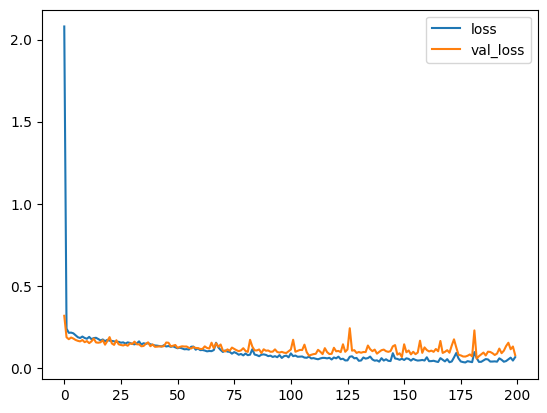

In [38]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

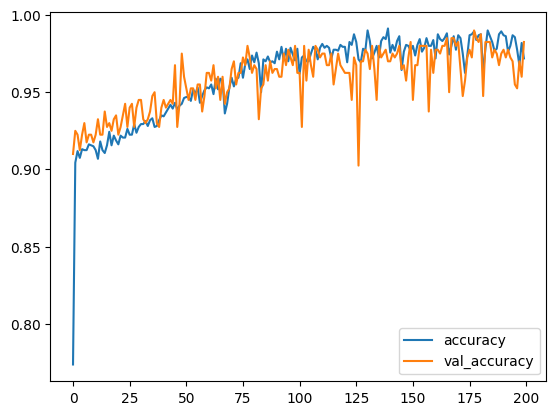

In [39]:
history_df[['accuracy', 'val_accuracy']].plot()

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmp3lb_llcw\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmp3lb_llcw\assets


7984

In [47]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [48]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

In [49]:
model.save('gas_mode_ann.h5')

In [65]:
model.predict([[180,30,45]])

1/1 [==============================] - 0s 45ms/step


array([[0.7202323]], dtype=float32)